Представьте, что вы работаете аналитиком в компании, которая занимается арендой велосипедов. Коллега из офиса в Лондоне прислал вам данные за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.

Описание данных
timestamp – дата и время (точность до часа)
cnt – количество аренд велосипедов за этот час
t1 – температура, в С
t2 – температура "ощущается как", в С 
hum – влажность (%)
wind_speed – скорость ветра, км/ч
weather_code – погодные условия:
1 – ясно (SKC)
2 – преимущественно ясно / встречаются отдельные облака (SCT)
3 – облачно / значительные облака (BKN)
4 – пасмурно (OVC)
7 – небольшой дождь Rain/ light Rain shower/ Light rain 
10 – дождь с грозой
26 – снегопад 
94 – ледяной туман (да, такое бывает!)
isholiday – является ли день праздником (1 – праздник, 0 – нет)
isweekend –  является ли день выходным (1 – выходной, 0 – нет)
season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
%matplotlib inline

In [7]:
df = pd.read_csv('/home/jupyter-a.komova-13/STAT/london.csv', parse_dates = ['timestamp'])

In [8]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [9]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [10]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
#Для начала попробуем посмотреть на число поездок по датам и времени. 
#Постройте график, где:

#по оси x – дата (timestamp)
#по оси y – число поездок (cnt)

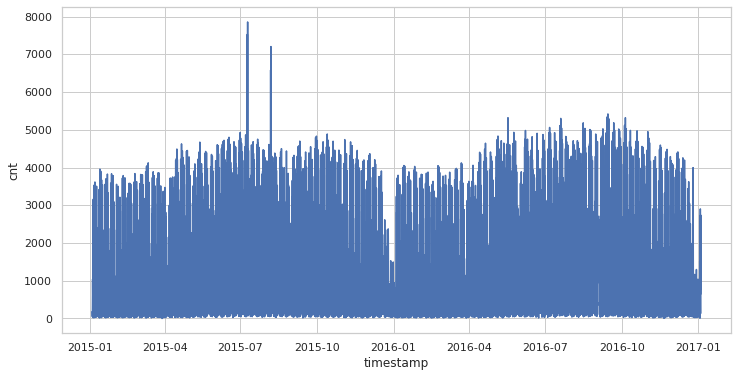

In [13]:
sns.set(rc={'figure.figsize':(12,6)}, style='whitegrid')
sns.lineplot(x='timestamp', y='cnt', data=df)

In [ ]:
#Агрегируйте число поездок по дням и визуализируйте результат. 
#Что вы можете сказать о полученном графике?

In [14]:
df.sort_values(by='timestamp', inplace=True)
df.set_index('timestamp', drop=False, inplace=True)

In [15]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


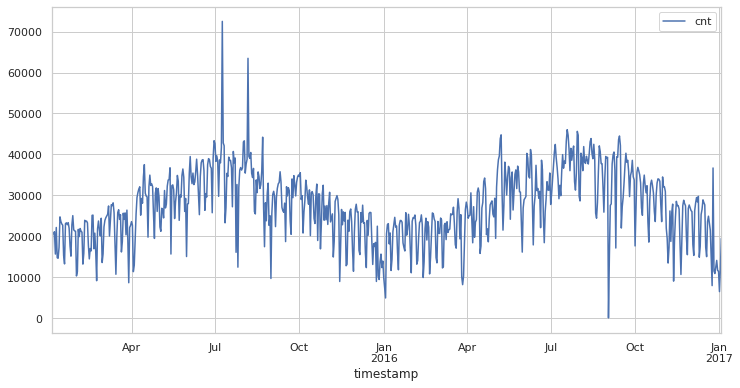

In [16]:
df.resample('D').agg({'cnt' : 'sum'}).plot()

Итак, вы обнаружили на графике некоторые скачки. Давайте проверим, что же могло произойти в тот день 🤔.

Для этого разделим дальнейшие действия на несколько этапов:

сначала посчитаем скользящее среднее, чтобы сгладить ряд
далее – разницу между наблюдаемыми и сглаженными значениями
определим верхние и нижние границы 99% доверительного интервала 
найдем причины аномалий!

In [ ]:
#На данном шаге возьмите агрегированные данные по дням с предыдущего шага 
#и посчитайте скользящее среднее с окном 3. 
#В качестве ответа укажите полученное число аренд за 2015-07-09, 
#округлив значение до целого.

In [17]:
df_by_day = df.resample('D').cnt.sum().reset_index()

In [18]:
df_by_day

,timestamp,cnt
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
726,2016-12-30,11566
727,2016-12-31,11424
728,2017-01-01,6421
729,2017-01-02,11823


In [24]:
df_by_day_roll3 = df.resample('D').cnt.sum().rolling(window = 3).mean().reset_index()

In [25]:
df_by_day_roll3

,timestamp,cnt
0,2015-01-04,NaN
1,2015-01-05,NaN
2,2015-01-06,16739.666667
3,2015-01-07,20683.000000
4,2015-01-08,19092.666667
...,...,...
726,2016-12-30,12682.000000
727,2016-12-31,12347.333333
728,2017-01-01,9803.666667
729,2017-01-02,9889.333333


In [26]:
df_by_day_roll3.query('timestamp == "2015-07-09"')

,timestamp,cnt
186,2015-07-09,50705.0


In [ ]:
#Теперь посчитайте разницу между наблюдаемыми и подсчитанными значениями. 
#Далее – примените функцию для подсчета стандартного отклонения. 

In [27]:
round(np.std(df_by_day['cnt'] - df_by_day_roll3['cnt']), 2)

4558.59

In [28]:
std = np.std(df_by_day['cnt'] - df_by_day_roll3['cnt'])

In [29]:
std

4558.58664111794

Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего, и создать следующие объекты:

upper_bound – верхняя граница; к средним прибавляем 2.576∗std
lower_bound – нижняя граница; вычитаем 2.576∗std
Полученные значения запишите в новые столбцы датафрейма с агрегированными данными.

Чему равно значение верхней границы для последнего наблюдения? Ответ укажите с точностью до 2 знаков после точки.

Note: в качестве std нужно брать стандартное отклонение без округления.



In [40]:
df_by_day['lower_bound'] = df_by_day_roll3['cnt'] - 2.576 * std

In [41]:
df_by_day['upper_bound'] = df_by_day_roll3['cnt'] + 2.576 * std

In [42]:
df_by_day

,timestamp,cnt,lower_bound,upper_bound
0,2015-01-04,9234,NaN,NaN
1,2015-01-05,20372,NaN,NaN
2,2015-01-06,20613,4996.747479,28482.585854
3,2015-01-07,21064,8940.080812,32425.919188
4,2015-01-08,15601,7349.747479,30835.585854
...,...,...,...,...
726,2016-12-30,11566,939.080812,24424.919188
727,2016-12-31,11424,604.414146,24090.252521
728,2017-01-01,6421,-1939.252521,21546.585854
729,2017-01-02,11823,-1853.585854,21632.252521


In [43]:
a = round(df_by_day.upper_bound.loc[730], 2)
a

24302.92

И наконец – изучим аномально высокие значения! Сначала выведите наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала.

В какой день значение числа аренд оказалось наибольшим? Укажите дату в формате 2020-12-31.

In [45]:
df_by_day[df_by_day.cnt > df_by_day.upper_bound]

,timestamp,cnt,lower_bound,upper_bound
186,2015-07-09,72504,38962.080812,62447.919188
214,2015-08-06,63468,34884.414146,58370.252521
609,2016-09-04,27512,2516.080812,26001.919188
721,2016-12-25,36653,7907.747479,31393.585854


Подумайте, в чем может быть причина столь высокого числа аренд в этот день. Для этого можете исследовать уже имеющиеся переменные в датасете, проверить наличие ошибок в данных (повторяющихся строк), а также использовать поиск Google. 

В качестве ответа выберите наиболее вероятную причину столь резкого скачка

In [46]:
df.query('timestamp == "2015-07-09"')

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-07-09,2015-07-09,400,16.0,16.0,55.0,14.0,1.0,0.0,0.0,1.0


In [1]:
#Забастовки в метро

Описание данных
timestamp – дата и время (точность до часа)
cnt – количество аренд велосипедов за этот час
t1 – температура, в С
t2 – температура "ощущается как", в С 
hum – влажность (%)
wind_speed – скорость ветра, км/ч
weather_code – погодные условия:
1 – ясно (SKC)
2 – преимущественно ясно / встречаются отдельные облака (SCT)
3 – облачно / значительные облака (BKN)
4 – пасмурно (OVC)
7 – небольшой дождь Rain/ light Rain shower/ Light rain 
10 – дождь с грозой
26 – снегопад 
94 – ледяной туман (да, такое бывает!)
isholiday – является ли день праздником (1 – праздник, 0 – нет)
isweekend –  является ли день выходным (1 – выходной, 0 – нет)
season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)

Проделайте аналогичную операцию для дней, когда число аренд оказалось ниже ожидаемого. В чем может быть причина падения числа аренд 2016-09-02?

In [52]:
df.query('timestamp == "2016-09-03"')

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,


In [50]:
df_by_day[df_by_day.cnt < df_by_day.lower_bound]

,timestamp,cnt,lower_bound,upper_bound
130,2015-05-14,15609,16966.414146,40452.252521
189,2015-07-12,23240,24293.747479,47779.585854
201,2015-07-24,16034,19270.747479,42756.585854
232,2015-08-24,17400,17786.414146,41272.252521
314,2015-11-14,8898,9294.414146,32780.252521
607,2016-09-02,0,14343.414146,37829.252521
615,2016-09-10,17080,19519.080812,43004.919188
621,2016-09-16,21967,24450.414146,47936.252521
678,2016-11-12,8990,9135.080812,32620.919188


In [53]:
df['2016-09-01' : '2016-09-03']

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2016-09-01 00:00:00,2016-09-01 00:00:00,322,18.0,18.0,68.0,15.0,1.0,0.0,0.0,2.0
2016-09-01 01:00:00,2016-09-01 01:00:00,186,17.0,17.0,73.0,16.0,1.0,0.0,0.0,2.0
2016-09-01 02:00:00,2016-09-01 02:00:00,89,16.5,16.5,75.0,16.0,1.0,0.0,0.0,2.0
2016-09-01 03:00:00,2016-09-01 03:00:00,56,16.0,16.0,74.5,11.0,2.0,0.0,0.0,2.0
2016-09-01 04:00:00,2016-09-01 04:00:00,64,16.0,16.0,77.0,12.0,2.0,0.0,0.0,2.0
2016-09-01 05:00:00,2016-09-01 05:00:00,133,15.0,15.0,82.0,11.0,2.0,0.0,0.0,2.0
2016-09-01 06:00:00,2016-09-01 06:00:00,811,15.0,15.0,82.0,12.0,2.0,0.0,0.0,2.0
2016-09-01 07:00:00,2016-09-01 07:00:00,2663,16.0,16.0,77.0,11.0,2.0,0.0,0.0,2.0
2016-09-01 08:00:00,2016-09-01 08:00:00,4631,16.5,16.5,75.0,9.0,2.0,0.0,0.0,2.0


In [2]:
#Ошибка при сборе данных